In [4]:
!pip install qiskit qiskit-aer

In [6]:
import qiskit
import qiskit_aer.noise as noise
from qiskit import IBMQ, Aer
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#Generate 3-qubit GHZ state
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
result_ideal = qiskit.execute(circ, aersim).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)

# Construct a noisy simulator backend from an IBMQ backend
# This simulator backend will be automatically configured
# using the device configuration and noise model 
#provider = IBMQ.load_account()
#backend = provider.get_backend('ibmq_athens')
#aersim_backend = AerSimulator.from_backend(backend)
# Error probabilities
prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
# Get basis gates from noise model
basis_gates = noise_model.basis_gates

aersim_backend = AerSimulator(device="GPU")

# Perform noisy simulation
result_noise = qiskit.execute(circ, aersim_backend, 
                            basis_gates=basis_gates,noise_model=noise_model).result()
counts_noise = result_noise.get_counts(0)

print('Counts(noise):', counts_noise)

plot_histogram(counts_noise)


ModuleNotFoundError: No module named 'qiskit_aer'

Simulation times on CPU: [0.029088819, 0.063515784, 0.125947515, 0.284175511, 0.582500379, 1.28622323, 2.251495086, 4.847139822, 9.762105147, 21.294847965, 46.02832246, 100.69839005, 214.356136071]
Simulation times on GPU: [0.001663248, 0.001329978, 0.001444174, 0.001524135, 0.002016648, 0.002840637, 0.005671366, 0.010115951, 0.0176741, 0.035978902, 0.068655002, 0.149603996, 0.298651278]


Text(0, 0.5, 'Simulation time (s)')

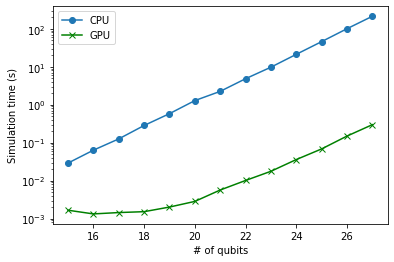

In [15]:
from qiskit import *
from qiskit.circuit.library import *
from qiskit.providers.aer import *
import matplotlib.pyplot as plt

sim_gpu = AerSimulator(method='statevector', device='GPU')
sim_cpu = AerSimulator(method='statevector', device='CPU')

shots = 100
depth=10

time_cpu= []
time_gpu= []
qubits_list = []

for qubits in range (15, 28):
    qubits_list.append(qubits)
    circuit_cpu = QuantumVolume(qubits, depth, seed=0)
    circuit_cpu.measure_all()
    circuit_cpu = transpile(circuit_cpu, sim_cpu)
    result_cpu = sim_cpu.run(circuit_cpu,sim_cpu,shots=shots,seed_simulator=12345,fusion_threshold=20).result()
    #counts = result.get_counts()
    time_cpu.append(float(result_cpu.to_dict()['results'][0]['time_taken']))
    
    circuit_gpu = QuantumVolume(qubits, depth, seed=0)
    circuit_gpu.measure_all()
    circuit_gpu = transpile(circuit_gpu, sim_gpu)
    result_gpu = sim_gpu.run(circuit_gpu,sim_gpu,shots=shots,seed_simulator=12345,fusion_threshold=20).result()
    #counts = result.get_counts()
    time_gpu.append(float(result_gpu.to_dict()['results'][0]['time_taken']))

print("Simulation times on CPU:", time_cpu, end='\n')
print("Simulation times on GPU:", time_gpu, end='\n')
plt.yscale("log")
plt.plot(qubits_list, time_cpu, marker="o", label='CPU')
plt.plot(qubits_list, time_gpu, 'g', marker="x", label='GPU')
plt.legend()
plt.xlabel("# of qubits")
plt.ylabel("Simulation time (s)")

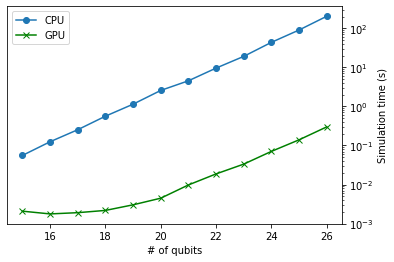

In [14]:
f = plt.figure()
ax=f.add_subplot(111)
plt.yscale("log")
plt.plot(qubits_list, time_cpu, marker="o", label='CPU')
plt.plot(qubits_list, time_gpu, 'g', marker="x", label='GPU')
plt.legend()
plt.xlabel("# of qubits")
plt.ylabel("Simulation time (s)")

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()